In [ ]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Exploratory Data Analysis with the Data Science Agent in BigQuery

This task covers some out of the box exploratory data analysis possible with the data science agent in Colab.

**Note:**
The features showcased use LLMs and the results are not deterministic. Also, there may be extremely minor Python errors that need fixing - especially print statements. Some of the methods used are at times simplistic.


## 1. Create a curated table that combines multiple tables

Add a code cell and click on "generate" and paste the following prompt and execute the code generated by the Data Science Agent. <br>

**Note:** <br>
Check for errors when it comes to print statements having a new line character and be prepared to fix the same.

`Create or replace a table that combines - (1) product_id, product_nm from product_master table, with (2) customer_id from customer_master table with (3) pos_transactions and (4) pos_transaction_items tables from the dataset rscw_oltp_stg_ds. Call the table customer_purchases_history and persist it to the BQ  dataset rscw_ml_ds. Be sure to include product_nm and customer_id columns.`

In [ ]:
# prompt: Create or replace a table that combines - (1) product_id, product_nm from product_master table, with (2) customer_id from customer_master table with (3) pos_transactions and (4) pos_transaction_items tables from the dataset rscw_oltp_stg_ds. Call the table customer_purchases_history and persist it to the BQ dataset rscw_ml_ds. Be sure to include product_nm and customer_id columns.

import pandas_gbq

project_id = "qwiklabs-gcp-02-554c9715ae31"

sql = """
CREATE OR REPLACE TABLE
  `qwiklabs-gcp-02-554c9715ae31.rscw_ml_ds.customer_purchases_history` AS
SELECT
  t.transaction_id,
  t.transaction_dt,
  t.customer_id,
  t.location_id,
  t.payment_type,
  t.payment_total_dollar,
  ti.product_id,
  pm.product_nm,
  ti.quantity,
  ti.price AS item_price,
  ti.line_item_total
FROM
  `qwiklabs-gcp-02-554c9715ae31.rscw_oltp_stg_ds.pos_transactions` AS t
JOIN
  `qwiklabs-gcp-02-554c9715ae31.rscw_oltp_stg_ds.pos_transaction_items` AS ti
  ON t.transaction_id = ti.transaction_id
JOIN
  `qwiklabs-gcp-02-554c9715ae31.rscw_oltp_stg_ds.product_master` AS pm
  ON ti.product_id = pm.product_id
"""

pandas_gbq.read_gbq(sql, project_id=project_id, dialect="standard")

print("Table `customer_purchases_history` created successfully in `qwiklabs-gcp-00-f3f075186056.rscw_ml_ds`.")

Downloading: |          |
Table `customer_purchases_history` created successfully in `qwiklabs-gcp-00-f3f075186056.rscw_ml_ds`.


## 2. Create a Pandas dataframe that we will reuse for the remainder of the lab module

In [5]:
import pandas as pd
df_customer_purchases = pandas_gbq.read_gbq("select * from rscw_ml_ds.customer_purchases_history", project_id=project_id)

Downloading: 100%|██████████|


## 3. Run OOTB Exploratory Data Analytics (EDA) against the table with Data Science Agent's help

Add a code cell and click on "generate" and paste the following prompt and execute the code generated by the Data Science Agent. <br>

**Note:** <br>
Check for errors when it comes to print statements having a new line character and be prepared to fix the same.

`You are an expert data analyst and data engineer. Run EDA on the dataframe df_customer_purchases. Note that all data is for a single state code - IL, where you would have run analysis on state code, run for city. Display charts where meaningful. Dont present any incomplete code. Ensure code presented is syntactically correct. Also, dont present any incomplete code. Generate code less than 100 lines of code
`

First 5 rows of df_customer_purchases:
                     transaction_id            transaction_dt  \
0  c79bdf061e22288609201ec60deb42fb 2024-05-01 18:58:54+00:00   
1  47d11383b93b217d96defbb2ef1a209b 2025-06-22 13:11:10+00:00   
2  1a77469cc9045a2ec0ddcb6c608e80c7 2025-06-06 11:21:31+00:00   
3  e723fd90e2d095c2762e5e800d759bfa 2024-11-25 17:14:25+00:00   
4  97369eeb115806c27ee2054105eabe97 2025-05-31 10:45:36+00:00   

                        customer_id location_id payment_type  \
0  fe4176df564772c058286208c0daa2a8   CHI-IL-ST  credit_card   
1  046f890135acc703faff4c1fc0c2d73c   CHI-IL-ST    gift_card   
2  a32bc3f28044954fa7641a2706dfab31   CHI-IL-ST         cash   
3  5dc6f4b9453584208557163c26079be1   CHI-IL-ST  credit_card   
4  35647e39316747b2bb470dc93ddb67aa   CHI-IL-ST    gift_card   

   payment_total_dollar                        product_id  \
0                  3.50  5304ff3fa35856a156e1170a6022d34d   
1                  3.85  0eeeb45e2f5911fd44282e5bb0c624ff   
2 

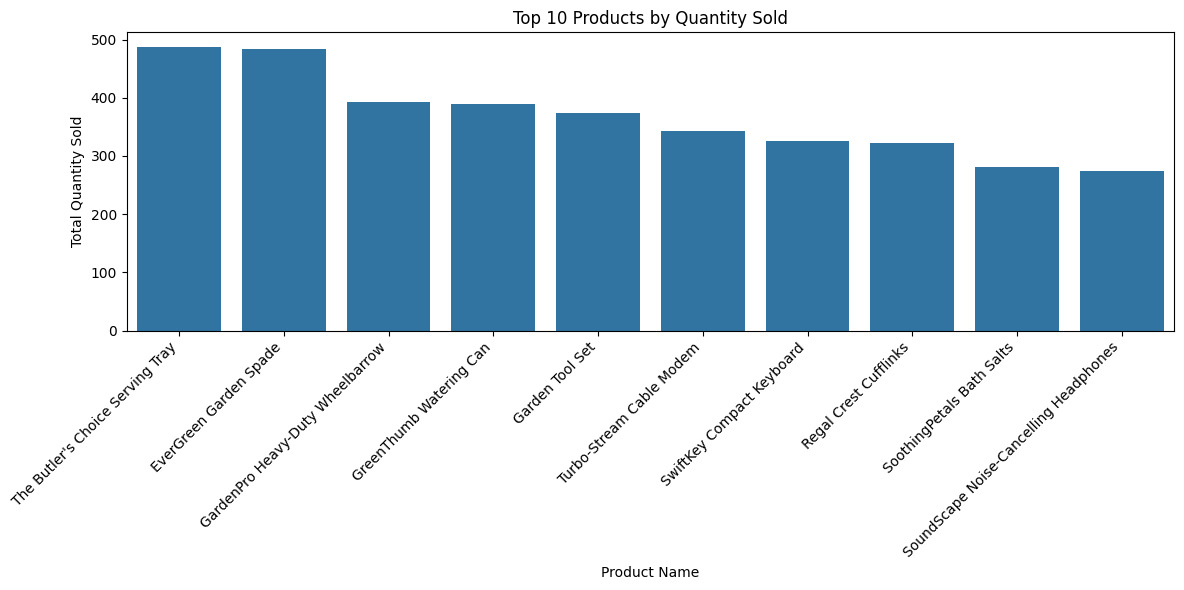

Sales by Payment Type:
payment_type
credit_card    10789012.68
cash            2391001.93
debit_card       175780.34
gift_card        129891.37
Name: payment_total_dollar, dtype: float64


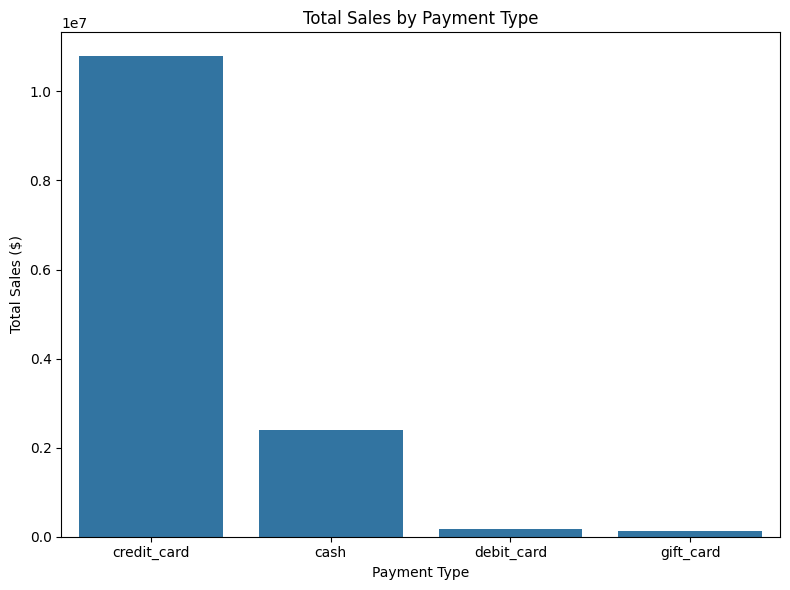

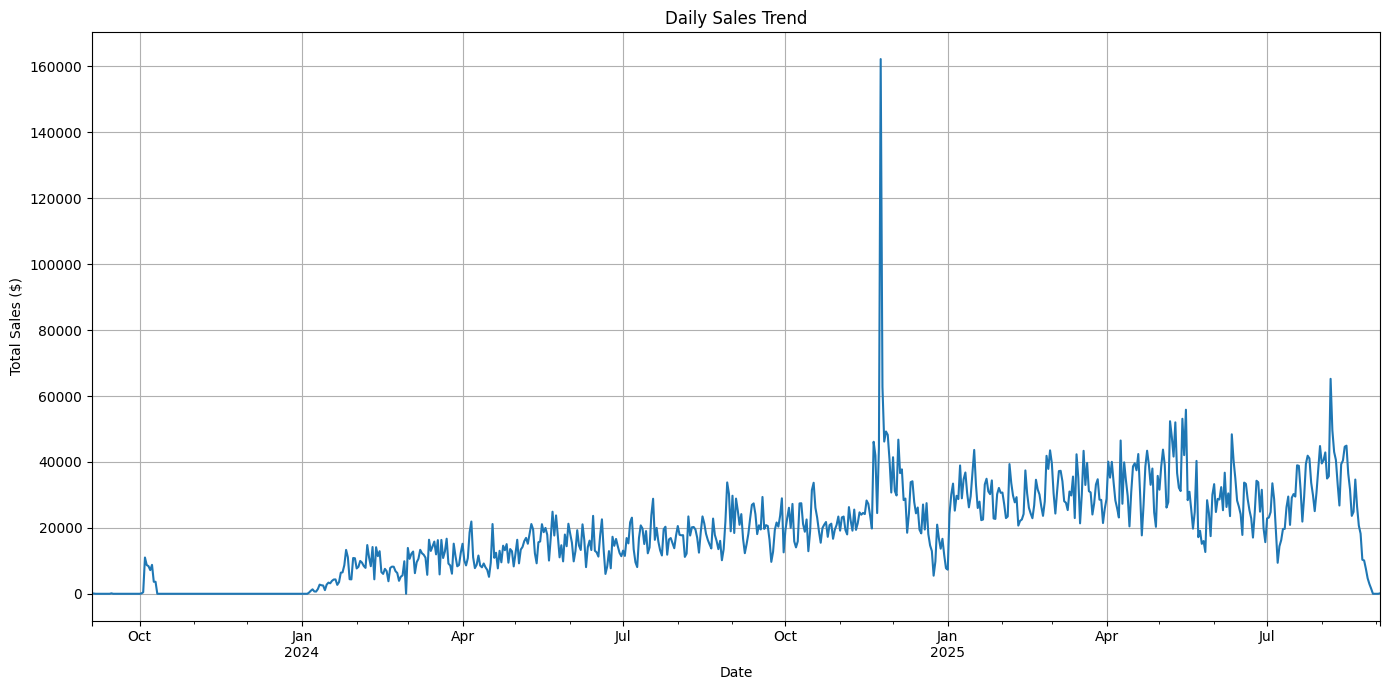

In [6]:
# prompt: You are an expert data analyst and data engineer. Run EDA on the dataframe df_customer_purchases. Note that all data is for a single state code - IL, where you would have run analysis on state code, run for city. Display charts where meaningful. Dont present any incomplete code. Ensure code presented is syntactically correct. Also, dont present any incomplete code. Generate code less than 100 lines of code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the dataframe
print("First 5 rows of df_customer_purchases:")
print(df_customer_purchases.head())

# Display basic information about the dataframe
print("DataFrame Info:")
df_customer_purchases.info()

# Display descriptive statistics
print("Descriptive Statistics:")
print(df_customer_purchases.describe())

# Analyze sales by product category (using product_nm as a proxy for category if category_nm is not available)
print("Top 10 Products by Quantity Sold:")
top_products = df_customer_purchases.groupby('product_nm')['quantity'].sum().nlargest(10)
print(top_products)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze sales by payment type
print("Sales by Payment Type:")
payment_type_sales = df_customer_purchases.groupby('payment_type')['payment_total_dollar'].sum().sort_values(ascending=False)
print(payment_type_sales)

plt.figure(figsize=(8, 6))
sns.barplot(x=payment_type_sales.index, y=payment_type_sales.values)
plt.title('Total Sales by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()

# Analyze sales over time (daily sales)
df_customer_purchases['transaction_dt'] = pd.to_datetime(df_customer_purchases['transaction_dt'])
daily_sales = df_customer_purchases.set_index('transaction_dt')['payment_total_dollar'].resample('D').sum()

plt.figure(figsize=(14, 7))
daily_sales.plot()
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Detect outliers with Data Science Agent's help

Add a code cell and click on "generate" and paste the following prompt and execute the code generated by the Data Science Agent. <br>

**Note:** <br>
Check for errors when it comes to print statements having a new line character and be prepared to fix the same.

`Identify any outliers in the data in dataframe df_customer_purchases`

Number of outliers in 'payment_total_dollar': 7589
Outliers in 'payment_total_dollar':
                        transaction_id  payment_total_dollar
3756  b3981f7b203bb77c3d52bc97e46c5b25                335.00
3762  b3981f7b203bb77c3d52bc97e46c5b25                335.00
4545  8608b68211e2b6a120ff2e767285e069                335.40
5014  04b7738ad5fbb213eeb7a2145bea8242                357.99
5555  5fbf5069e1db9d79733184b67a576c4d               1014.60


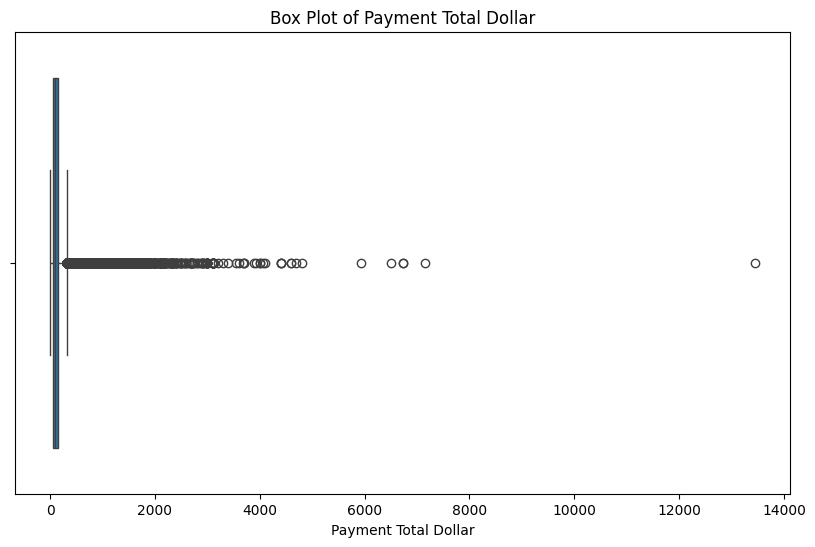

Number of outliers in 'quantity': 6446
Outliers in 'quantity':
                       transaction_id                      product_nm  \
56   43bc72f5380889da97627ba5ac7806be       Barely-There Bikini Thong   
93   ef1d282a121e2bee046bbab7f9f88331  Precision-Weight Barbell Plate   
150  12c66c45d332a69f08f11ceecf3dd8d4    Eco-Friendly Bamboo Utensils   
254  af4812c0286cb623517321205ffb5d1e            Constructo-Lite Tool   
354  c8b785ff006155b23afd689ffdf7975e   Secret Garden Eau de Toilette   

     quantity  
56          2  
93          2  
150         2  
254         2  
354         2  


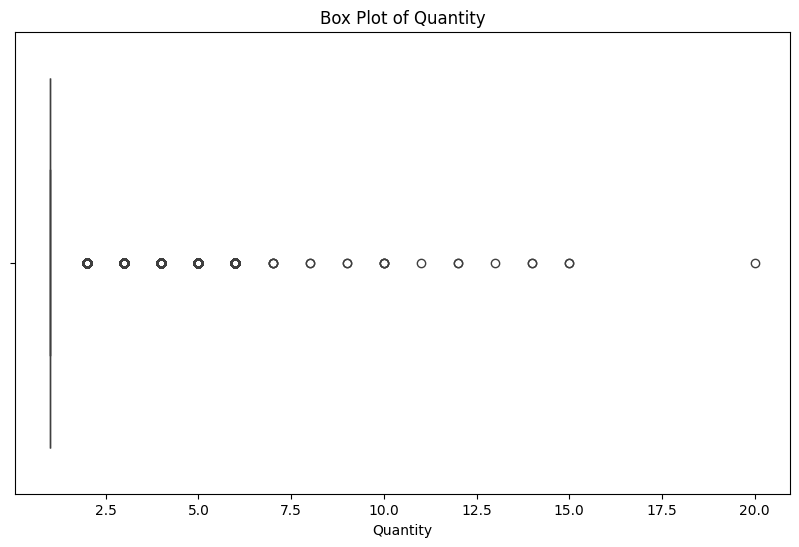

Number of outliers in 'item_price': 7324
Outliers in 'item_price':
                         transaction_id                      product_nm  \
21492  76df43658d302b7e5418f9c5b366b4bd       Imperial Collection Watch   
21493  520bc702936ffe80d33a4632792835cd              Legacy Men's Watch   
21494  ba58760d97361d60f4af393e41c236cc           Elegance Chrono Watch   
21495  38303e0a3dce8b2bce37ca13b1c3f9ac         ReserveBatch Craft Wine   
21498  4599031af27f0cc484a02ada76c68ca2  RhinoRamp Heavy-Duty Car Ramps   

       item_price  
21492      284.80  
21493      284.90  
21494      284.90  
21495      284.99  
21498      285.00  


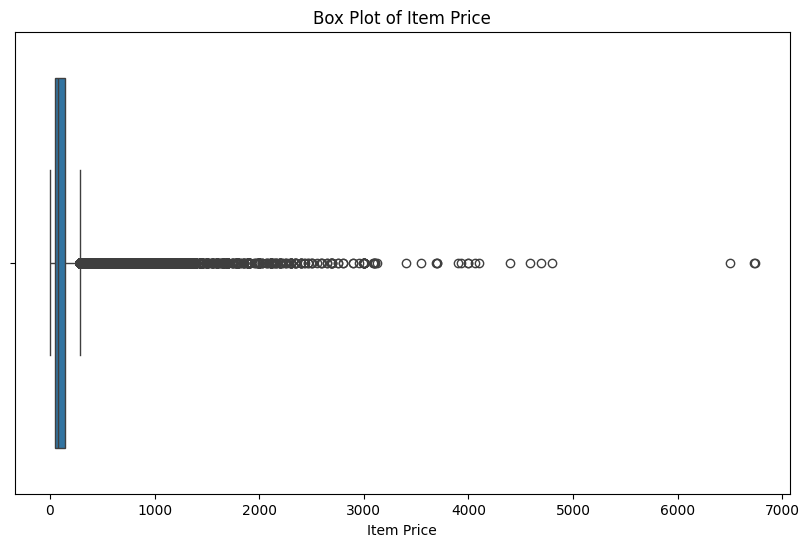

In [8]:
# prompt: Identify any outliers in the data in dataframe df_customer_purchases

import matplotlib.pyplot as plt
import seaborn as sns

# Outlier detection for 'payment_total_dollar' using IQR method
Q1 = df_customer_purchases['payment_total_dollar'].quantile(0.25)
Q3 = df_customer_purchases['payment_total_dollar'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_payment_total = df_customer_purchases[(df_customer_purchases['payment_total_dollar'] < lower_bound) | (df_customer_purchases['payment_total_dollar'] > upper_bound)]

print(f"Number of outliers in 'payment_total_dollar': {len(outliers_payment_total)}")
print("Outliers in 'payment_total_dollar':")
print(outliers_payment_total[['transaction_id', 'payment_total_dollar']].head())

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_customer_purchases['payment_total_dollar'])
plt.title('Box Plot of Payment Total Dollar')
plt.xlabel('Payment Total Dollar')
plt.show()

# Outlier detection for 'quantity' using IQR method
Q1_qty = df_customer_purchases['quantity'].quantile(0.25)
Q3_qty = df_customer_purchases['quantity'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty
lower_bound_qty = Q1_qty - 1.5 * IQR_qty
upper_bound_qty = Q3_qty + 1.5 * IQR_qty

outliers_quantity = df_customer_purchases[(df_customer_purchases['quantity'] < lower_bound_qty) | (df_customer_purchases['quantity'] > upper_bound_qty)]

print(f"Number of outliers in 'quantity': {len(outliers_quantity)}")
print("Outliers in 'quantity':")
print(outliers_quantity[['transaction_id', 'product_nm', 'quantity']].head())

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_customer_purchases['quantity'])
plt.title('Box Plot of Quantity')
plt.xlabel('Quantity')
plt.show()

# Outlier detection for 'item_price' using IQR method
Q1_price = df_customer_purchases['item_price'].quantile(0.25)
Q3_price = df_customer_purchases['item_price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

outliers_item_price = df_customer_purchases[(df_customer_purchases['item_price'] < lower_bound_price) | (df_customer_purchases['item_price'] > upper_bound_price)]

print(f"Number of outliers in 'item_price': {len(outliers_item_price)}")
print("Outliers in 'item_price':")
print(outliers_item_price[['transaction_id', 'product_nm', 'item_price']].head())

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_customer_purchases['item_price'])
plt.title('Box Plot of Item Price')
plt.xlabel('Item Price')
plt.show()

## 4. Detect missing values with Data Science Agent's help

Add a code cell and click on "generate" and paste the following prompt and execute the code generated by the Data Science Agent. <br>

**Note:** <br>
Check for errors when it comes to print statements having a new line character and be prepared to fix the same.

`Identify any missing values in the data in dataframe df_customer_purchases and suggest replacement values`

In [9]:
# prompt: Identify any missing values in the data in dataframe df_customer_purchases and suggest replacement values

print("Missing values before handling:")
print(df_customer_purchases.isnull().sum())

# Suggest replacement values for numerical columns with missing values
for col in df_customer_purchases.select_dtypes(include=['number']).columns:
    if df_customer_purchases[col].isnull().any():
        median_val = df_customer_purchases[col].median()
        print(f"Suggested replacement for missing values in '{col}': Median ({median_val})")
        # Example of how to fill: df_customer_purchases[col].fillna(median_val, inplace=True)

# Suggest replacement values for categorical columns with missing values
for col in df_customer_purchases.select_dtypes(include=['object']).columns:
    if df_customer_purchases[col].isnull().any():
        mode_val = df_customer_purchases[col].mode()[0]
        print(f"Suggested replacement for missing values in '{col}': Mode ('{mode_val}')")
        # Example of how to fill: df_customer_purchases[col].fillna(mode_val, inplace=True)

# For datetime columns, depending on the context, forward fill, backward fill, or a specific date might be appropriate.
for col in df_customer_purchases.select_dtypes(include=['datetime64']).columns:
    if df_customer_purchases[col].isnull().any():
        print(f"Suggested replacement for missing values in '{col}': Consider forward fill, backward fill, or a specific default date.")
        # Example of how to fill: df_customer_purchases[col].fillna(method='ffill', inplace=True)

print("Note: The suggestions above are general. The best replacement strategy depends on the specific context and domain knowledge of each column.")

Missing values before handling:
transaction_id          0
transaction_dt          0
customer_id             0
location_id             0
payment_type            0
payment_total_dollar    0
product_id              0
product_nm              0
quantity                0
item_price              0
line_item_total         0
dtype: int64
Note: The suggestions above are general. The best replacement strategy depends on the specific context and domain knowledge of each column.


## 5. Detect correlations between numerical features with Data Science Agent's help

Add a code cell and click on "generate" and paste the following prompt and execute the code generated by the Data Science Agent. <br>

**Note:** <br>
Check for errors when it comes to print statements having a new line character and be prepared to fix the same.

`Show me the correlations between numerical features in the data in dataframe df_customer_purchases`

Correlation Matrix of Numerical Features:
                      payment_total_dollar  quantity  item_price  \
payment_total_dollar              1.000000  0.138209    0.914732   
quantity                          0.138209  1.000000   -0.048661   
item_price                        0.914732 -0.048661    1.000000   
line_item_total                   0.972027  0.135711    0.942643   

                      line_item_total  
payment_total_dollar         0.972027  
quantity                     0.135711  
item_price                   0.942643  
line_item_total              1.000000  


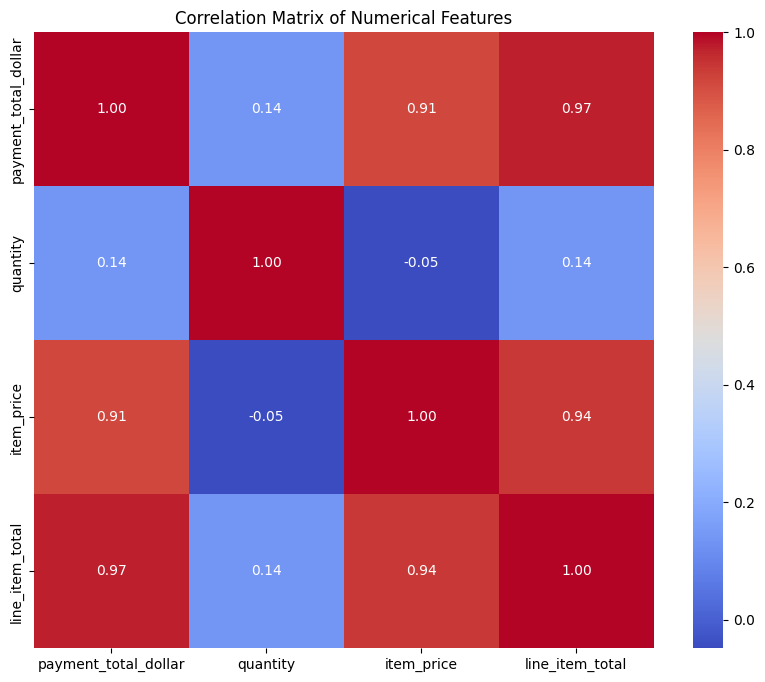

In [10]:
# prompt: Show me the correlations between numerical features in the data in dataframe df_customer_purchases

import matplotlib.pyplot as plt
numerical_df = df_customer_purchases.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

print("Correlation Matrix of Numerical Features:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## 6. Explore the distribution of customers with Data Science Agent's help

Add a code cell and click on "generate" and paste the following prompt and execute the code generated by the Data Science Agent. <br>

**Note:** <br>
Check for errors when it comes to print statements having a new line character and be prepared to fix the same.

`Show me the distribution of customers by city, distribution of customers by spend in the data in dataframe df_customer_purchases, render as piechart. Dont generate code greater than 95 lines.`

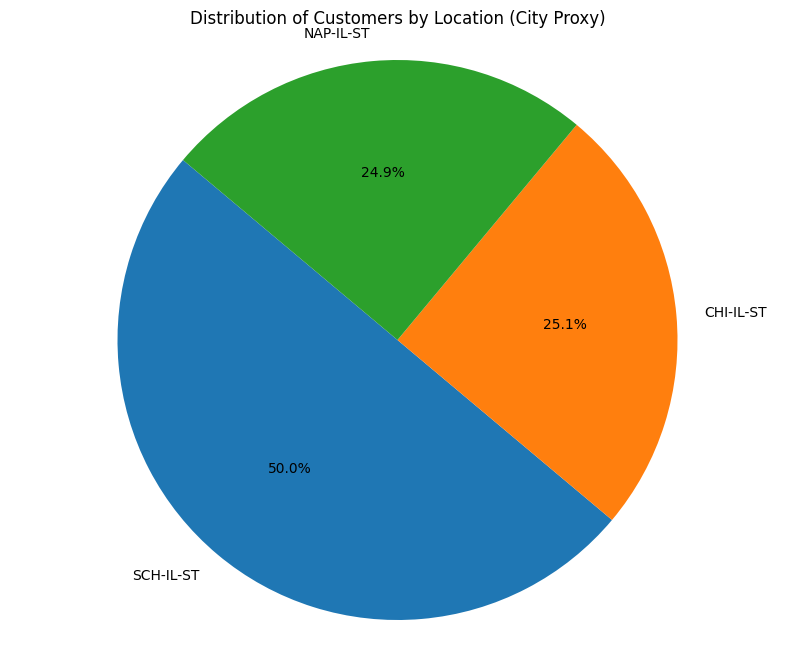

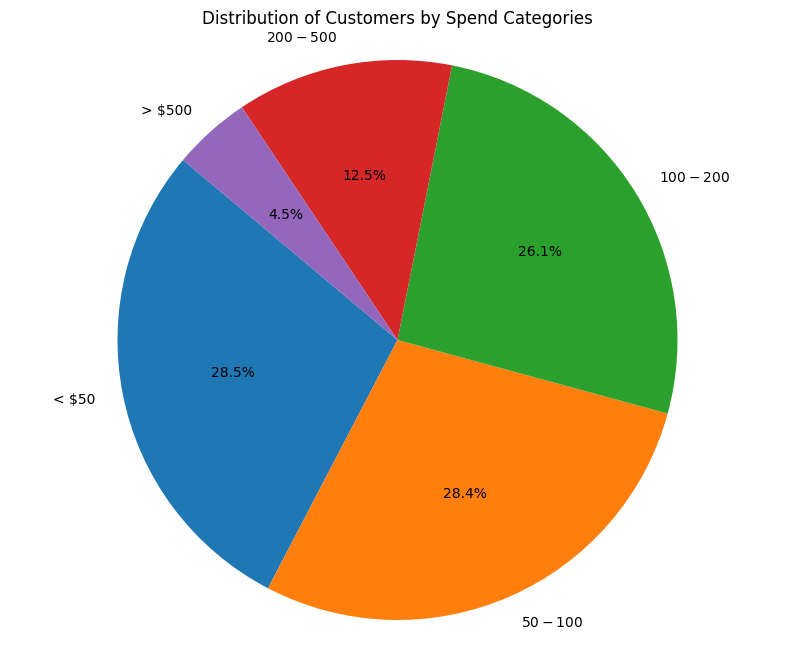

In [11]:
# prompt: Show me the distribution of customers by city, distribution of customers by spend in the data in dataframe df_customer_purchases, render as piechart. Dont generate code greater than 95 lines.

import pandas as pd
import matplotlib.pyplot as plt
# Distribution of customers by city (assuming 'location_id' can be used as a proxy for city in this dataset)
# If a separate city column is available in customer_master, it would be better to join and use that.
# For this dataset, we'll use location_id as a proxy for different locations/cities.
customer_city_distribution = df_customer_purchases.groupby('customer_id')['location_id'].first().value_counts()

plt.figure(figsize=(10, 8))
plt.pie(customer_city_distribution, labels=customer_city_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customers by Location (City Proxy)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Distribution of customers by spend
customer_spend_distribution = df_customer_purchases.groupby('customer_id')['payment_total_dollar'].sum()

# To visualize this as a pie chart, we might need to categorize the spend into bins
# or show the top N customers. A direct pie chart of all individual customer spends
# would be too cluttered if there are many customers.
# Let's categorize into spend levels for a more readable pie chart.
bins = [0, 50, 100, 200, 500, customer_spend_distribution.max() + 1]
labels = ['< $50', '$50 - $100', '$100 - $200', '$200 - $500', '> $500']
customer_spend_categories = pd.cut(customer_spend_distribution, bins=bins, labels=labels, right=False)
spend_category_counts = customer_spend_categories.value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(spend_category_counts, labels=spend_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customers by Spend Categories')
plt.axis('equal')
plt.show()

## 7. Visualizations

Add a code cell and click on "generate" and paste the following prompt and execute the code generated by the Data Science Agent. <br>

**Note:** <br>
Check for errors when it comes to print statements having a new line character and be prepared to fix the same.

`Create visualizations such as histograms, box plots, scatter plots, and bar charts that represent the distributions of individual variables and the relationships between them in dataframe df_customer_purchases. Note that all data is for a few citites in Illinois, in USA. Ensure code you generate is less than 95 lines`

## This concludes the task, proceed back to the lab instuctions page.